In [20]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore") # for anonymity
sns.set_style("darkgrid")
sns.set_palette('colorblind')

In [21]:
from generate_corpora import corpus_from_json
from analysis import *

## Results for retrained RNN models on Clefting & Topicalization (w/intro)

In [22]:
retrained_constructions = ['cleft', 'intro_topic']
constructions = ['cleft', 'intro_topic', 'nointro_topic', 'tough']
all_island_effects = []
all_island_surprisals = []
for model in retrained_constructions:
    for construction in constructions:
        control_filename =  os.path.join("grammar_outputs", "experiment2", model, f"{construction}_grammar_c.json")
        island_filename =  os.path.join("grammar_outputs", "experiment2", model, f"{construction}_grammar_i.json")
        control_tuples = corpus_from_json(control_filename, is_tuples = True)
        island_tuples = corpus_from_json(island_filename, is_tuples = True)
        all_island_effects += island_effects_for_model(model, control_tuples, island_tuples, construction)
        all_island_surprisals += island_surprisals("control", control_tuples, model, construction)
        all_island_surprisals += island_surprisals("island", island_tuples, model, construction)

cleft_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/cleft_rnn/island_cnp_obj_grnn.json", is_tuples = True)
cleft_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/cleft_rnn/island_cnp_that_grnn.json", is_tuples = True)
topic_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/topic_rnn/island_cnp_obj_grnn.json", is_tuples = True)
topic_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/topic_rnn/island_cnp_that_grnn.json", is_tuples = True)
cleft_cnp_island_effects = island_effects_for_model("cleft", cleft_cnp_control, cleft_cnp_island, "wh_movement")
topic_cnp_island_effects = island_effects_for_model("intro_topic", topic_cnp_control, topic_cnp_island, "wh_movement")
all_island_surprisals += island_surprisals("control", cleft_cnp_control, 'cleft', "wh_movement")
all_island_surprisals += island_surprisals("island", cleft_cnp_island, 'cleft', "wh_movement")
all_island_surprisals += island_surprisals("control", topic_cnp_control, 'intro_topic', "wh_movement")
all_island_surprisals += island_surprisals("island", topic_cnp_island, 'intro_topic', "wh_movement")

constructions.append("wh_movement")
island_effects = pd.DataFrame(cleft_cnp_island_effects + topic_cnp_island_effects + all_island_effects)
all_island_surprisals = pd.DataFrame(all_island_surprisals)

In [9]:
construction_map = {
    "wh_movement": "Wh-Movement",
    "cleft": "Clefting",
    "intro_topic": "Topicalization with \n Intro",
    "nointro_topic": "Topicalization without \n Intro",
    "tough": "Tough Movement"
}
island_effects = pd.DataFrame(island_effects)
island_effects["construction"] = island_effects['construction'].apply(lambda const: construction_map[const])


Text(0.5, 1.05, 'Filler effects in RNN augmented with Clefting')

<Figure size 4000x2200 with 0 Axes>

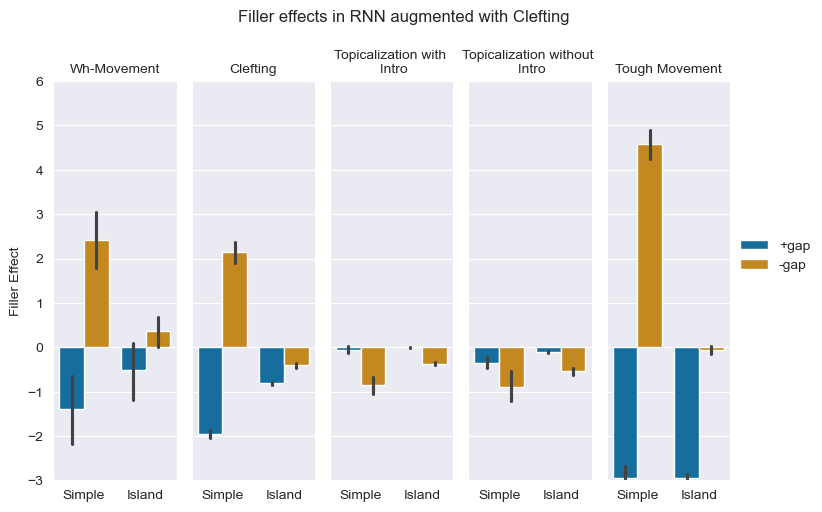

In [10]:
cleft_rnn = island_effects[island_effects['model'] == 'cleft']
plt.figure(figsize=(40, 22))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=cleft_rnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.ylim(-3, 6)
plt.suptitle("Filler effects in RNN augmented with Clefting", y = 1.05)
#plt.savefig("figures/gpt2_expt1.png")

Text(0.5, 1.05, 'Filler Effects in LM augmented with Topicalization')

<Figure size 2400x1500 with 0 Axes>

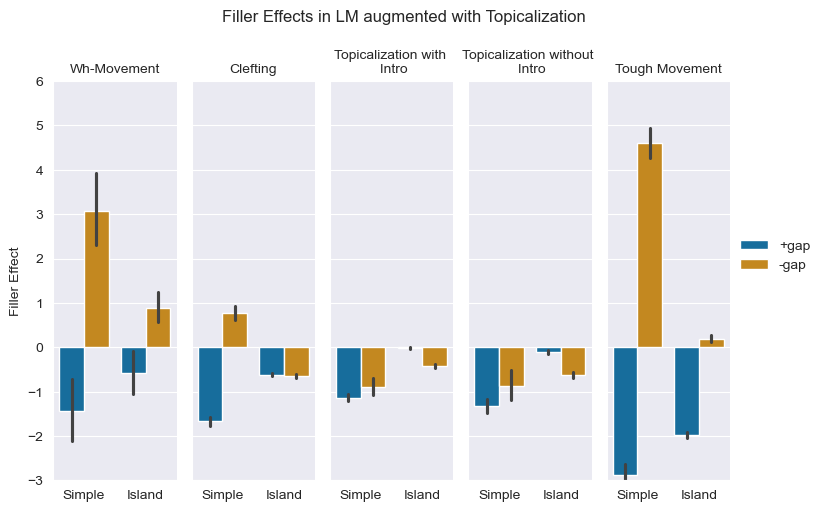

In [11]:
topic_rnn = island_effects[island_effects['model'] == 'intro_topic']
plt.figure(figsize=(24, 15))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=topic_rnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.ylim(-3, 6)
plt.suptitle("Filler Effects in LM augmented with Topicalization", y = 1.05)
#plt.savefig("figures/grnn_expt1.png")

In [12]:
island_effects.to_csv("data/augmented_island_effects.csv", index = False)

## Testing for basic FG interaction

In [13]:
fg_formula = "surprisal ~ wh * gap + (1 | item)"
simple_surprisals = all_island_surprisals[all_island_surprisals['island'] == 0]
effects = interaction_effects(fg_formula, constructions, retrained_constructions, simple_surprisals, False)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood: -5163.113 	 AIC: 10338.225

Random effects:

                 Name    Var    Std
item      (Intercept)  3.184  1.784
Residual               9.592  3.097

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood: -5163.113 	 AIC: 10338.225

Random effects:

                 Name    Var    Std
item      (Intercept)  3.184  1.784
Residual               9.592  3.097

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood: -5052

In [14]:
pd.DataFrame(effects)

,Estimate,P-val,Sig,model,condition,interaction_type
wh:gap,-4.096,0.000,***,cleft,cleft,filler_gap
wh:gap,0.800,0.002,**,cleft,intro_topic,filler_gap
wh:gap,0.545,0.238,,cleft,nointro_topic,filler_gap
wh:gap,-7.513,0.000,***,cleft,tough,filler_gap
wh:gap,-3.816,0.022,*,cleft,wh_movement,filler_gap
wh:gap,-2.439,0.000,***,intro_topic,cleft,filler_gap
wh:gap,-0.252,0.230,,intro_topic,intro_topic,filler_gap
wh:gap,-0.461,0.205,,intro_topic,nointro_topic,filler_gap
wh:gap,-7.483,0.000,***,intro_topic,tough,filler_gap
wh:gap,-4.513,0.020,*,intro_topic,wh_movement,filler_gap


In [8]:
island_formula = "surprisal~wh*gap*island+(gap||item)"
effects = interaction_effects(island_formula, constructions, retrained_constructions, all_island_surprisals)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -43758.889 	 AIC: 87539.779

Random effects:

                 Name     Var    Std
item      (Intercept)   5.868  2.422
item.1            gap  11.146  3.339
Residual                1.776  1.333

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -43758.889 	 AIC: 87539.779

Random effects:

                 Name     Var    Std
item      (Intercept)   5.868  2.422
item.1            gap  11.146  3.339
Residual                1.776  1.333

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

F

In [9]:
pd.DataFrame(effects).reset_index()[['interaction_type', 'Estimate', 'P-val', 'model', 'condition']]

,interaction_type,Estimate,P-val,model,condition
0,filler_gap,-4.096,0.000,cleft,cleft
1,island_filler_gap,3.695,0.000,cleft,cleft
2,filler_gap,0.800,0.000,cleft,intro_topic
3,island_filler_gap,-0.437,0.000,cleft,intro_topic
4,filler_gap,0.545,0.002,cleft,nointro_topic
5,island_filler_gap,-0.112,0.546,cleft,nointro_topic
6,filler_gap,-7.513,0.000,cleft,tough
7,island_filler_gap,4.622,0.000,cleft,tough
8,filler_gap,-3.816,0.000,cleft,wh_movement
9,island_filler_gap,2.942,0.009,cleft,wh_movement


## Gap Effects

In [23]:
def code_island(value):
    if value == 1:
        return -0.5
    else:
        return 0.5
def code_filler(value):
    if value == 1:
        return 0.5
    else:
        return -0.5
all_island_surprisals['island'] = all_island_surprisals['island'].apply(code_island)
all_island_surprisals['filler'] = all_island_surprisals['wh'].apply(code_filler)

In [56]:
formula = "surprisal ~ filler * island + (1 | item)"
gap_effects = per_gap_models(formula, constructions, retrained_constructions, all_island_surprisals, False)


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -22369.381 	 AIC: 44750.762

Random effects:

                 Name    Var    Std
item      (Intercept)  6.367  2.523
Residual               2.515  1.586

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -22369.381 	 AIC: 44750.762

Random effects:

                 Name    Var    Std
item      (Intercept)  6.367  2.523
Residual               2.515  1.586

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374

In [63]:
gap_effects[(gap_effects["model"] == "cleft") & (gap_effects['construction'] == "tough")]

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig,model,construction,gap
(Intercept),19.884,19.783,19.985,0.052,7955.689,385.924,0.000,***,cleft,cleft,0
filler,0.866,0.761,0.971,0.054,5372.553,16.158,0.000,***,cleft,cleft,0
island,3.359,3.224,3.495,0.069,6262.109,48.508,0.000,***,cleft,cleft,0
filler:island,2.547,2.337,2.757,0.107,5372.553,23.750,0.000,***,cleft,cleft,0
(Intercept),15.676,15.589,15.762,0.044,6098.885,355.471,0.000,***,cleft,cleft,1
filler,-1.382,-1.444,-1.321,0.031,5341.945,-44.183,0.000,***,cleft,cleft,1
island,-0.827,-0.908,-0.746,0.041,5644.126,-19.973,0.000,***,cleft,cleft,1
filler:island,-1.148,-1.270,-1.025,0.063,5341.945,-18.341,0.000,***,cleft,cleft,1
(Intercept),19.273,19.173,19.374,0.051,7346.653,374.996,0.000,***,cleft,intro_topic,0
filler,-0.614,-0.707,-0.520,0.048,5366.951,-12.847,0.000,***,cleft,intro_topic,0


In [69]:
gap_effects[(gap_effects["model"] == "intro_topic") & (gap_effects['construction'] == "tough")]

SyntaxError: invalid syntax (3186990744.py, line 1)

In [33]:
gap_effects.to_csv("data/retrained_gap_effects.csv")